# KNN- Algorithm implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load Data set 
from pydataset import data
iris=data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris.Species=iris.Species.map({'setosa':1, 'versicolor':2, 'virginica':3})

In [8]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


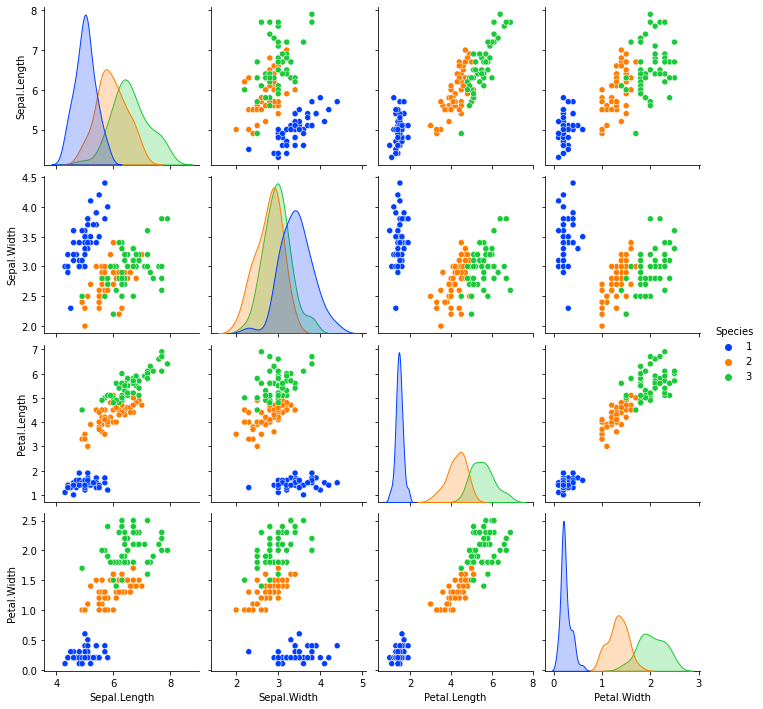

In [11]:
#Visualization
sns.pairplot(iris,hue='Species',palette='bright')

In [12]:
# Create X and y
X=iris.iloc[:,:-1]
y=iris.Species

In [27]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=123,stratify=y)

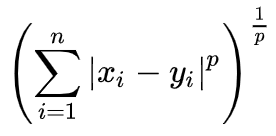

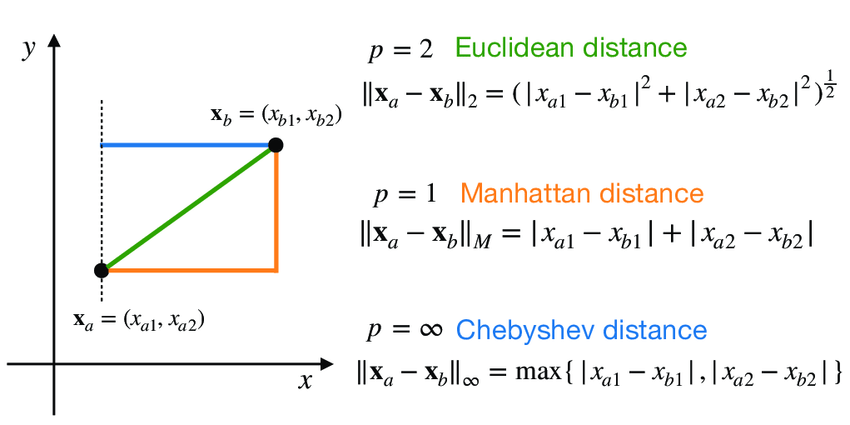

In [28]:
X_train.shape

(112, 4)

In [29]:
y_train.shape

(112,)

In [36]:
# Model Building #sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNNC_model=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski').fit(X_train,y_train)
KNNC_model

KNeighborsClassifier()

In [ ]:
# Attributes of the Model

In [32]:
KNNC_model.classes_

array([1, 2, 3], dtype=int64)

In [33]:
KNNC_model.effective_metric_

'euclidean'

In [37]:
KNNC_model.effective_metric_params_

{}

In [38]:
KNNC_model.n_features_in_

4

In [39]:
KNNC_model.feature_names_in_

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
      dtype=object)

In [40]:
KNNC_model.n_samples_fit_

112

In [41]:
KNNC_model.outputs_2d_

False

In [ ]:
# Model Performance

In [42]:
KNNC_model.score(X_test,y_test)

0.9736842105263158

In [44]:
y_pred=KNNC_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

<AxesSubplot:>

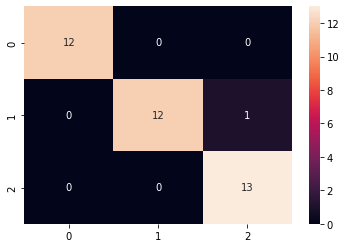

In [48]:
sns.heatmap(cm,annot=True)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.92      0.96        13
           3       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [53]:
new_data=[[4.7,3.2,1.3,5.2]]
KNNC_model.predict(new_data)

array([2], dtype=int64)

# KNN Regression

In [ ]:
#sklearn.neighbors.KNeighborsRegressor

In [54]:
# Load Dataset
import pandas as pd
path= 'https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/FuelConsumptionCo2.csv'
co2_data=pd.read_csv(path)
co2_data.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [56]:
# Select the features

X=co2_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [58]:
y=co2_data[['CO2EMISSIONS']]
y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [60]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=12)

In [62]:
# build the model
from sklearn.neighbors import KNeighborsRegressor
KNNR_model=KNeighborsRegressor(n_neighbors=5,p=2,metric='minkowski').fit(X_train,y_train)

In [ ]:
# model score

In [63]:
KNNR_model.score(X_test,y_test)

0.9997668293965496

In [66]:
# model prediction
new_data=[[2.0,4,8.5,196]]
KNNR_model.predict(new_data)

array([[196.]])